In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
# from conversion import convert_to_3_stroke
from face_data import load_faces
from tqdm import tqdm

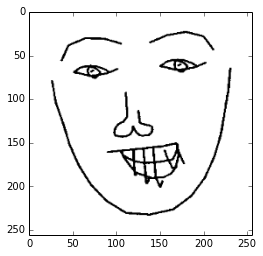

In [2]:
im = cv2.imread('example_1.png', 0)
plt.imshow(im, cmap=plt.cm.gray)
plt.show()

In [3]:
from conversion import get_window_3_stroke

stroke = get_window_3_stroke(im, 0, 0, window_size=100)


[[34. 99.  0.]
 [ 1. -1.  0.]
 [ 1.  1.  0.]
 ...
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  1.]]


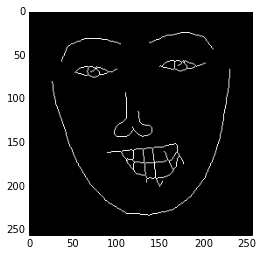

0 0


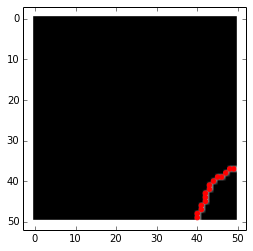

50 0


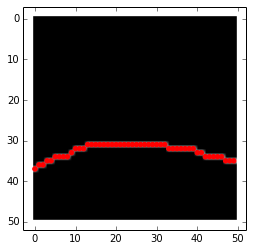

100 0


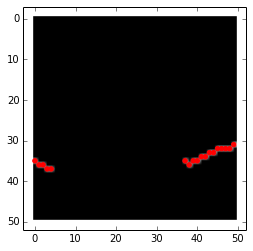

150 0


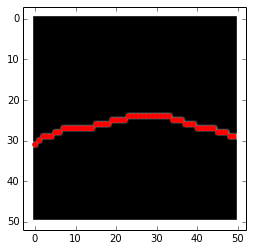

200 0


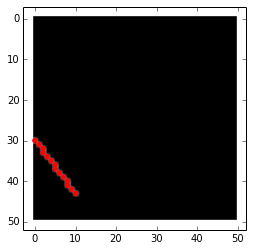

0 50


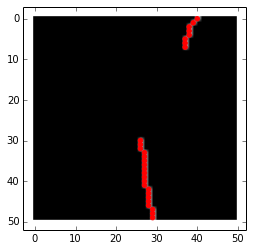

50 50


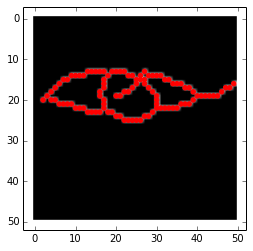

100 50


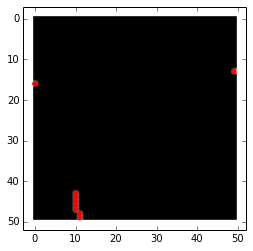

150 50


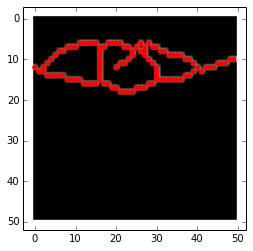

200 50


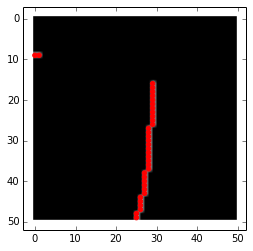

0 100


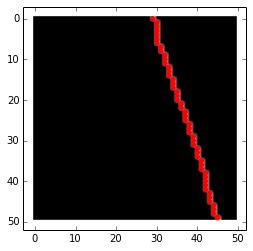

50 100


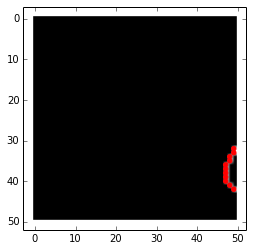

100 100


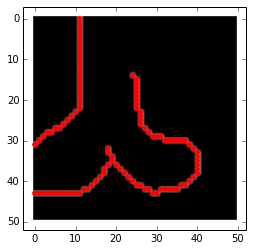

150 100
200 100


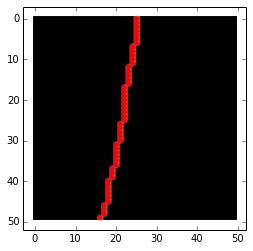

0 150


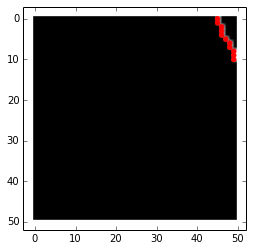

50 150


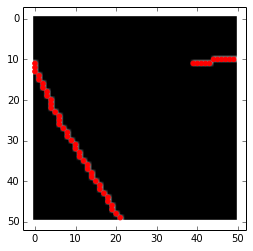

100 150


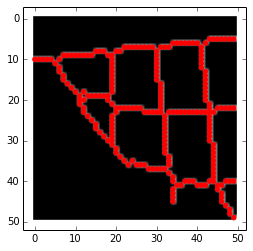

150 150


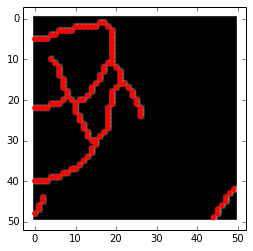

200 150


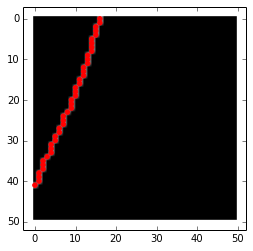

0 200
50 200


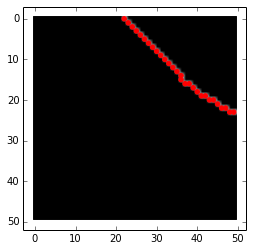

100 200


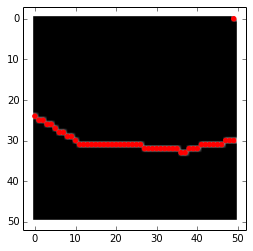

150 200


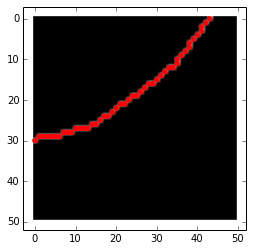

200 200


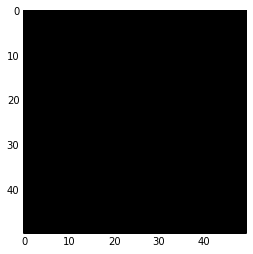

In [67]:
from thinning import guo_hall_thinning as gh_thinning
from potrace import Bitmap
from random import sample
from rdp import rdp

_, th = cv2.threshold(im,127,255,cv2.THRESH_BINARY_INV)
thin = gh_thinning(th)
plt.imshow(thin, 'gray')
plt.show()

w = 50
ran = [0, 50, 100, 150, 200]
for j in ran:
    for i in ran:
        print i, j
        window = thin[j:j+w,i:i+w]
        plt.imshow(window, 'gray')
        points = np.argwhere(window != 0)
        if len(points) == 0:
            continue
        y, x = points.T
        plt.scatter(x, y, color='red')
        plt.show()


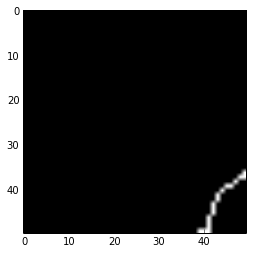

TypeError: exceptions must be old-style classes or derived from BaseException, not NoneType

In [97]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import networkx as nx

for j in ran:
    for i in ran:
        
        window = im[j:j+w,i:i+w]
        _, th = cv2.threshold(window,127,255,cv2.THRESH_BINARY_INV)
        thin = gh_thinning(th)
        
        plt.imshow(thin, 'gray')
        plt.show()
        
        raise
        
        plt.imshow(window, 'gray')
        points = np.argwhere(window != 0)
        
        if len(points) == 0:
            continue
        
        # segment graph into clusters
        db = DBSCAN(eps=5)
        labels = db.fit_predict(points)
        
        for label in range(len(set(labels))):
            cluster = points[labels == label]
            
            if len(cluster) == 0:
                continue
            
            # make a graph connecting points to nearest two nodes
            clf = NearestNeighbors(2).fit(cluster)
            G = clf.kneighbors_graph()

            T = nx.from_scipy_sparse_matrix(G)
            
            # order nodes by shortest distance
            paths = [list(nx.dfs_preorder_nodes(T, i)) for i in range(len(cluster))]

            best_order = None
            best_cost = float('inf')
            longest = 0
            for i, path in enumerate(paths):
                ordered = cluster[path]
                cost = (((ordered[:-1] - ordered[1:])**2).sum(1)).sum()
                 
                if cost < best_cost and len(ordered) >= longest:
                    best_cost = cost
                    best_order = cluster[paths[i]]
                    longest = len(ordered)
        
#             best_order = rdp(best_order, epsilon=1)
            yy, xx = best_order.T
            
            if label == 0:
                color = 'red'
            elif label == 1:
                color = 'blue'
            elif label == 2:
                color = 'yellow'
            else:
                color = 'purple'
            plt.plot(xx, yy, c=color)
            
        plt.show()
            
        continue
            
        raise NotImplementedError
            
        
        
        # order nodes by shortest distance
        paths = [list(nx.dfs_preorder_nodes(T, i)) for i in range(len(points))]
        
        best_order = None
        best_cost = float('inf')
        for i, path in enumerate(paths):
            ordered = points[path]
            cost = (((ordered[:-1] - ordered[1:])**2).sum(1)).sum()
            
            plt.imshow(window, 'gray')
            yy, xx = ordered.T
            plt.plot(xx, yy, color='red')
            plt.show()
            
            if cost < best_cost:
                best_cost = cost
                best_order = points[paths[i]]
        
#         best_order = rdp(best_order, epsilon=1)
        yy, xx = best_order.T
        
#         y, x = points.T
#         xx = x[order]
#         yy = y[order]
        plt.plot(xx, yy, color='red')
        plt.show()
#         

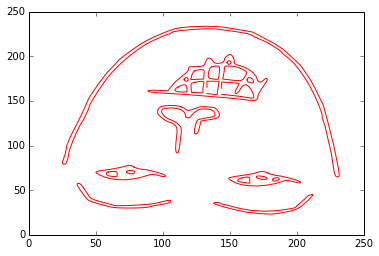

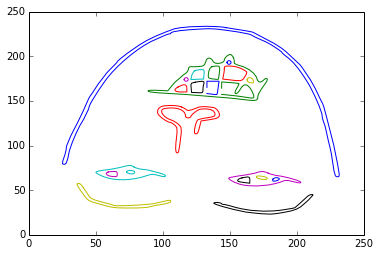

In [18]:
strokes = convert_to_3_stroke(im)
x = [0]
y = [0]
for dx, dy, eos in strokes:
    x.append(x[-1]+dx)
    y.append(y[-1]+dy)
    if eos:
        plt.plot(x[1:], y[1:])
        x = [x[-1]]
        y = [y[-1]]
plt.show()

  0%|          | 0/205 [00:00<?, ?it/s]

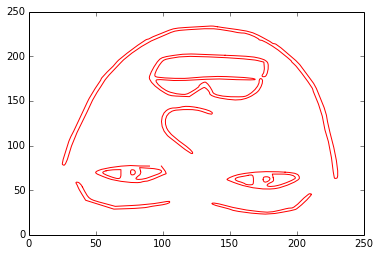

  0%|          | 1/205 [00:00<01:00,  3.35it/s]

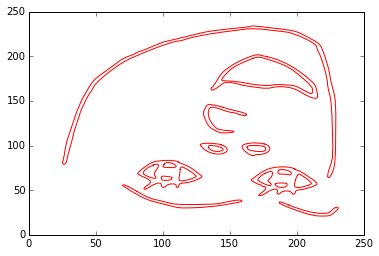

  1%|          | 2/205 [00:00<01:04,  3.15it/s]

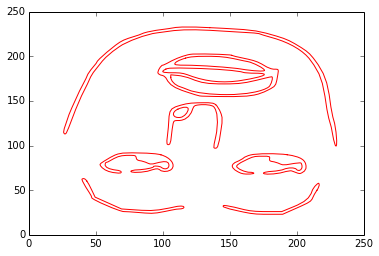

  1%|▏         | 3/205 [00:00<01:01,  3.29it/s]

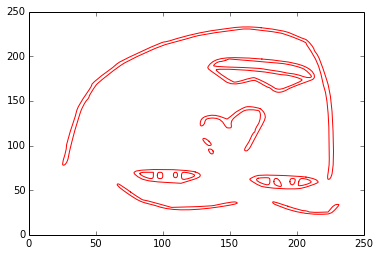

  2%|▏         | 4/205 [00:01<01:02,  3.19it/s]

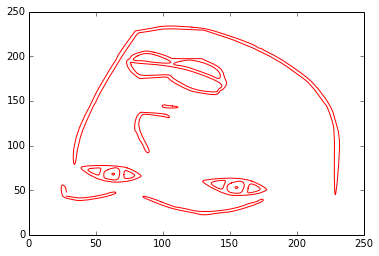

  2%|▏         | 5/205 [00:01<01:01,  3.24it/s]

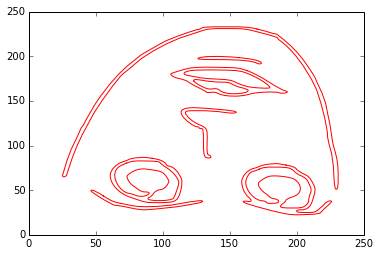

  3%|▎         | 6/205 [00:01<01:00,  3.31it/s]

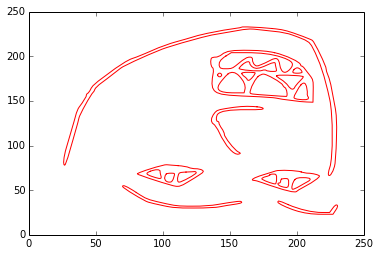

  3%|▎         | 7/205 [00:02<00:59,  3.32it/s]

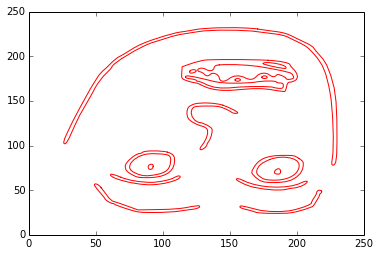

  4%|▍         | 8/205 [00:02<00:59,  3.31it/s]

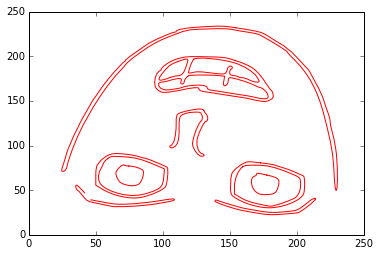

  4%|▍         | 9/205 [00:02<00:58,  3.33it/s]

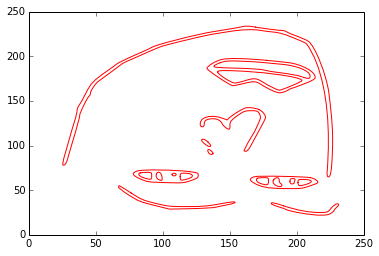

  5%|▍         | 10/205 [00:02<00:58,  3.34it/s]

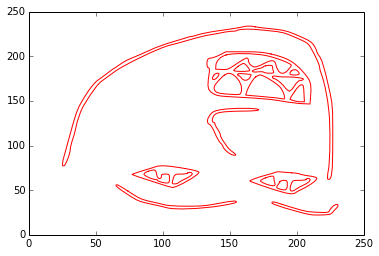

  5%|▌         | 11/205 [00:03<00:58,  3.34it/s]

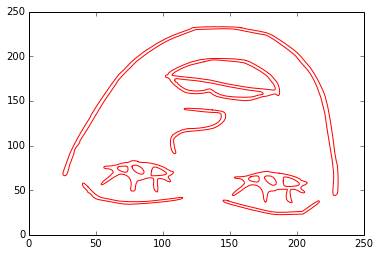

  6%|▌         | 12/205 [00:03<00:58,  3.31it/s]

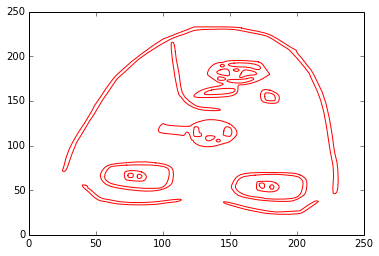

  6%|▋         | 13/205 [00:03<00:58,  3.31it/s]

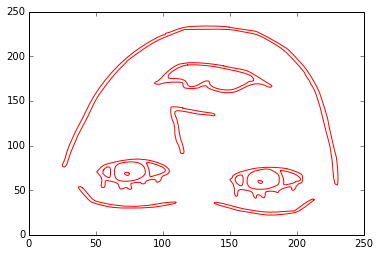

  7%|▋         | 14/205 [00:04<00:58,  3.29it/s]

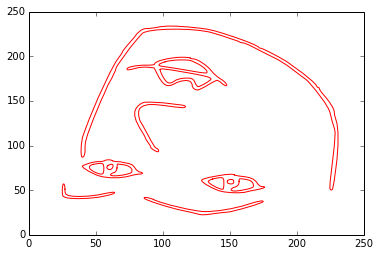

  7%|▋         | 15/205 [00:04<00:57,  3.31it/s]

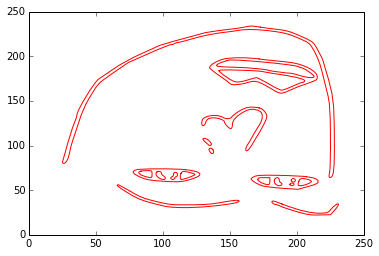

  8%|▊         | 16/205 [00:04<00:57,  3.30it/s]

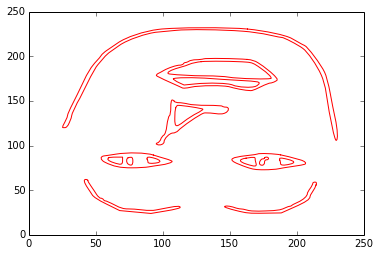

  8%|▊         | 17/205 [00:05<00:56,  3.31it/s]

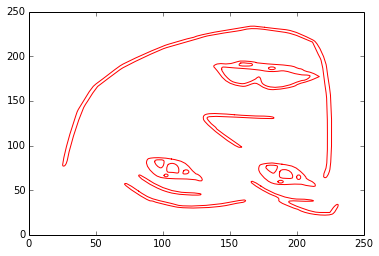

  9%|▉         | 18/205 [00:05<00:56,  3.31it/s]

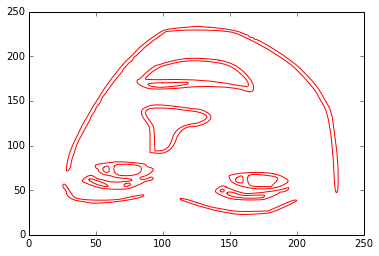

  9%|▉         | 19/205 [00:05<00:56,  3.32it/s]

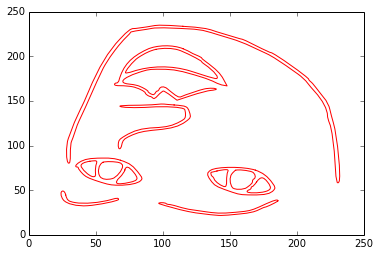

 10%|▉         | 20/205 [00:06<00:55,  3.32it/s]

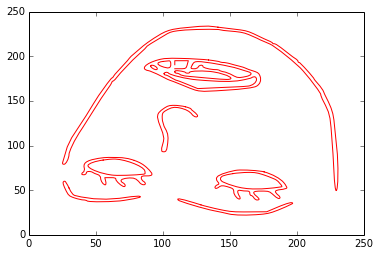

 10%|█         | 21/205 [00:06<00:55,  3.34it/s]

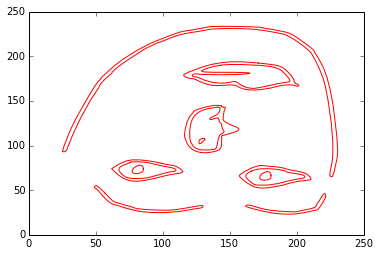

 11%|█         | 22/205 [00:06<00:54,  3.35it/s]

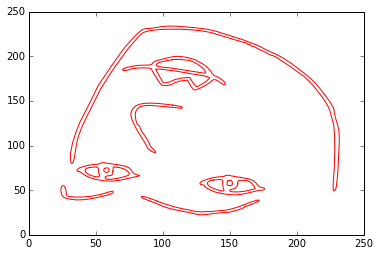

 11%|█         | 23/205 [00:06<00:54,  3.35it/s]

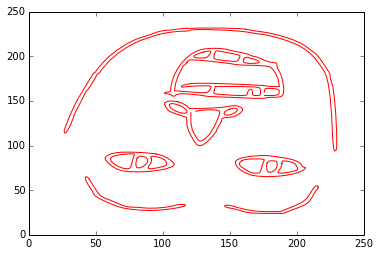

 12%|█▏        | 24/205 [00:07<00:54,  3.33it/s]

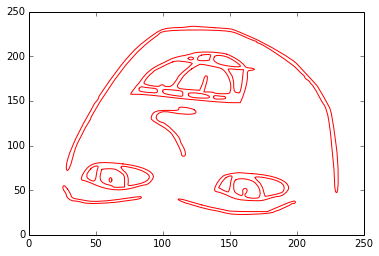

 12%|█▏        | 25/205 [00:07<00:54,  3.30it/s]

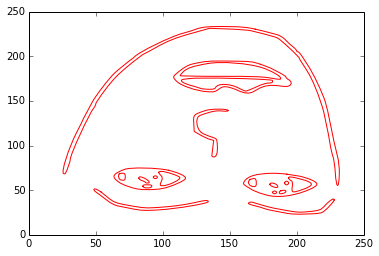

 13%|█▎        | 26/205 [00:07<00:54,  3.30it/s]

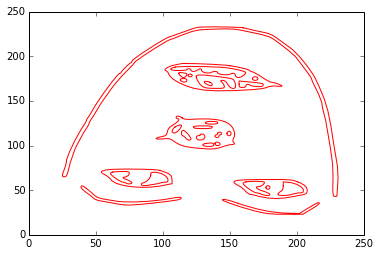

 13%|█▎        | 27/205 [00:08<00:54,  3.27it/s]

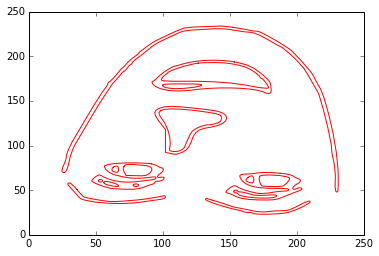

 14%|█▎        | 28/205 [00:08<00:55,  3.16it/s]

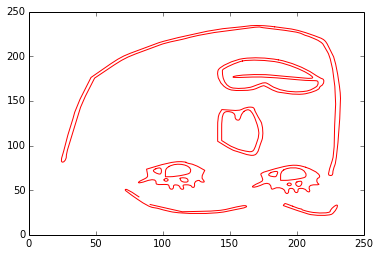

 14%|█▍        | 29/205 [00:09<00:56,  3.10it/s]

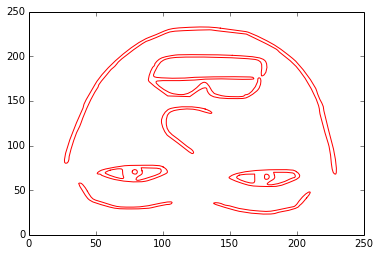

 15%|█▍        | 30/205 [00:09<00:56,  3.11it/s]

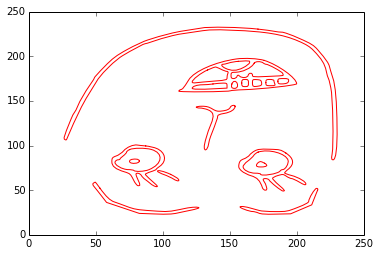

 15%|█▌        | 31/205 [00:09<00:55,  3.11it/s]

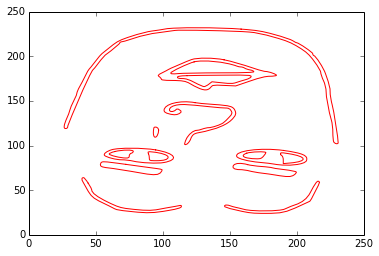

 16%|█▌        | 32/205 [00:10<00:55,  3.11it/s]

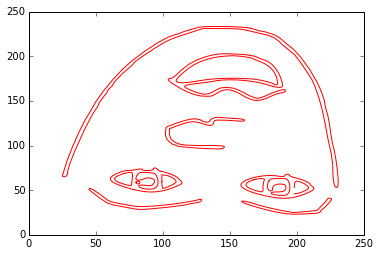

 16%|█▌        | 33/205 [00:10<00:55,  3.11it/s]

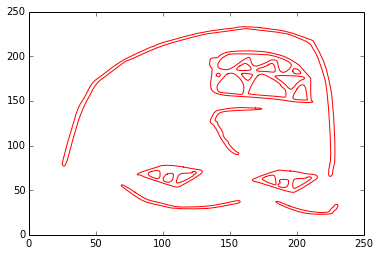

 17%|█▋        | 34/205 [00:10<00:55,  3.11it/s]

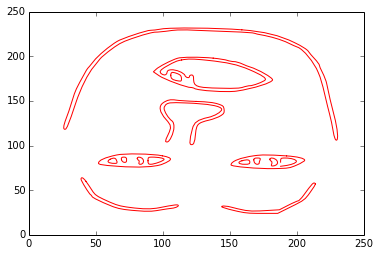

 17%|█▋        | 35/205 [00:11<00:54,  3.10it/s]

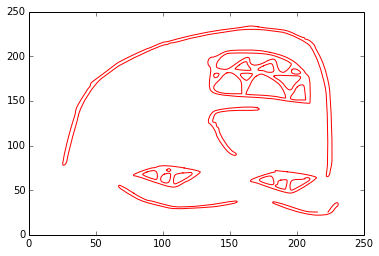

 18%|█▊        | 36/205 [00:11<00:54,  3.10it/s]

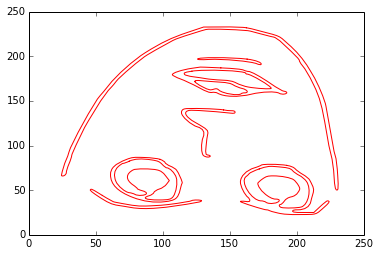

 18%|█▊        | 37/205 [00:11<00:54,  3.10it/s]

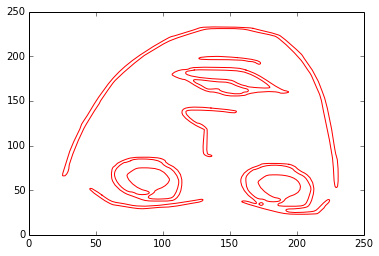

 19%|█▊        | 38/205 [00:12<00:53,  3.11it/s]

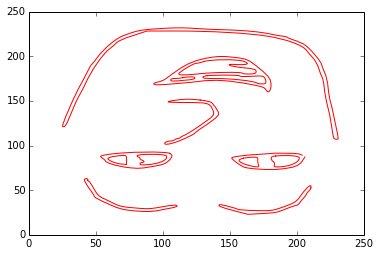

 19%|█▉        | 39/205 [00:12<00:53,  3.11it/s]

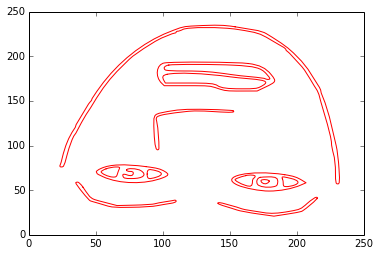

 20%|█▉        | 40/205 [00:12<00:53,  3.11it/s]

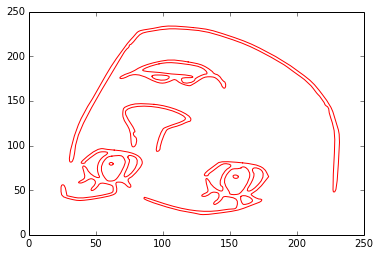

 20%|██        | 41/205 [00:13<00:52,  3.12it/s]

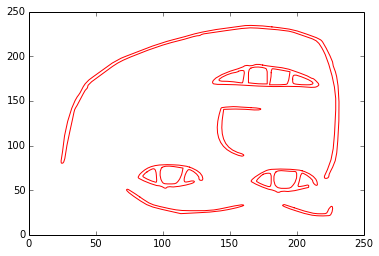

 20%|██        | 42/205 [00:13<00:52,  3.12it/s]

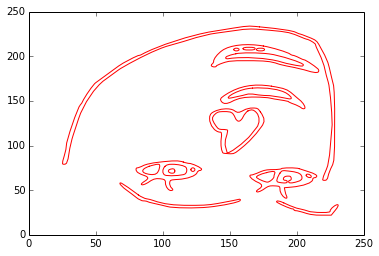

 21%|██        | 43/205 [00:13<00:52,  3.11it/s]

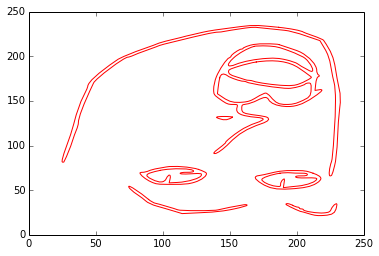

 21%|██▏       | 44/205 [00:14<00:51,  3.11it/s]

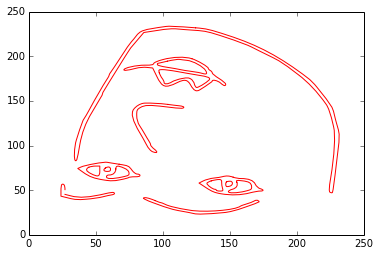

 22%|██▏       | 45/205 [00:14<00:51,  3.11it/s]

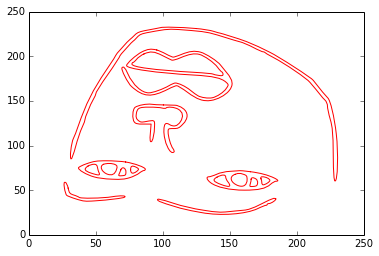

 22%|██▏       | 46/205 [00:14<00:51,  3.11it/s]

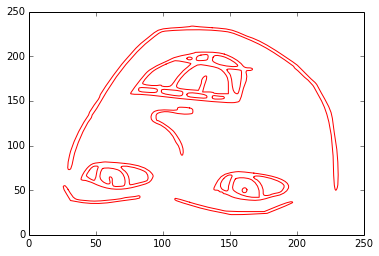

 23%|██▎       | 47/205 [00:15<00:50,  3.10it/s]

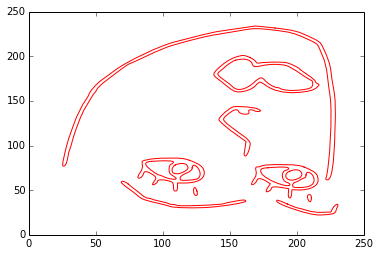

 23%|██▎       | 48/205 [00:15<00:50,  3.10it/s]

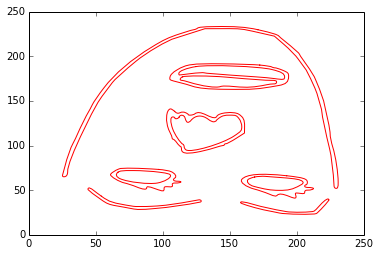

 24%|██▍       | 49/205 [00:15<00:50,  3.11it/s]

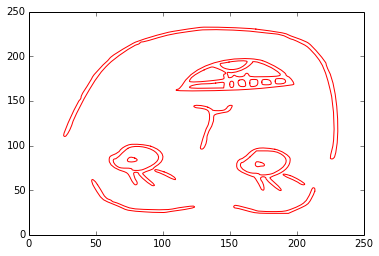

 24%|██▍       | 50/205 [00:16<00:49,  3.11it/s]

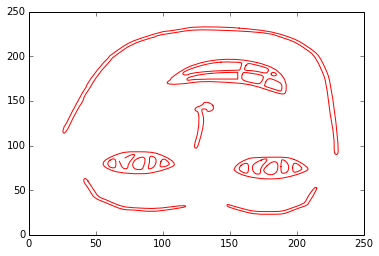

 25%|██▍       | 51/205 [00:16<00:49,  3.10it/s]

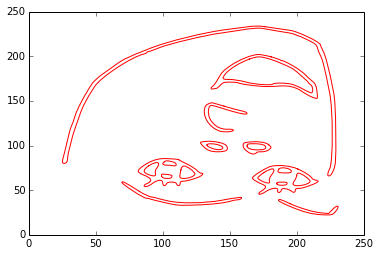

 25%|██▌       | 52/205 [00:16<00:49,  3.10it/s]

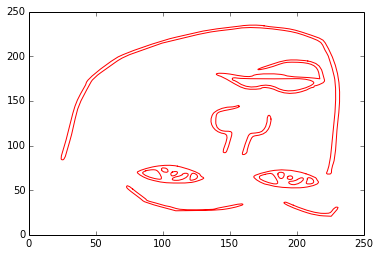

 26%|██▌       | 53/205 [00:17<00:49,  3.09it/s]

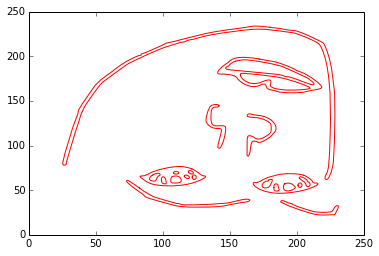

 26%|██▋       | 54/205 [00:17<00:48,  3.08it/s]

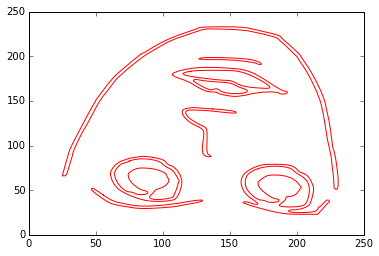

 27%|██▋       | 55/205 [00:17<00:48,  3.09it/s]

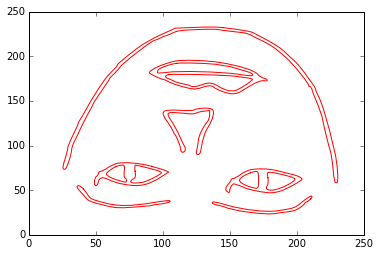

 27%|██▋       | 56/205 [00:18<00:48,  3.09it/s]

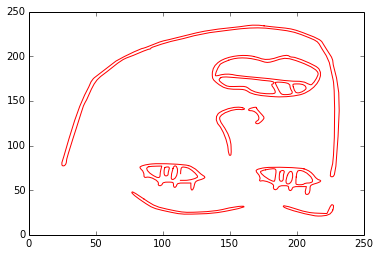

 28%|██▊       | 57/205 [00:18<00:48,  3.08it/s]

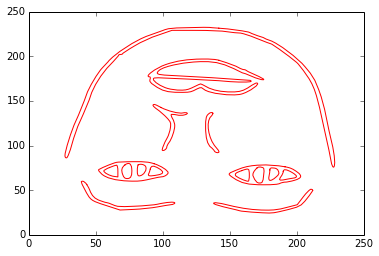

 28%|██▊       | 58/205 [00:18<00:47,  3.08it/s]

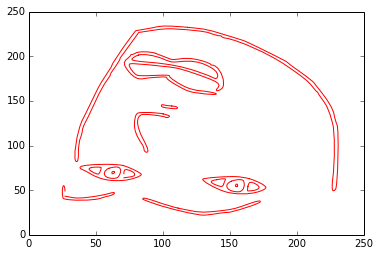

 29%|██▉       | 59/205 [00:19<00:47,  3.09it/s]

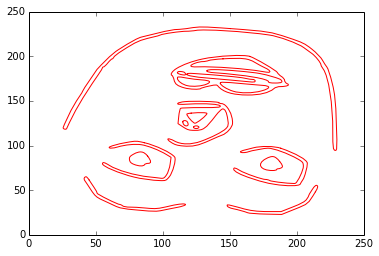

 29%|██▉       | 60/205 [00:19<00:46,  3.09it/s]

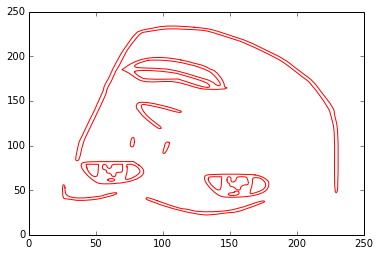

 30%|██▉       | 61/205 [00:19<00:46,  3.10it/s]

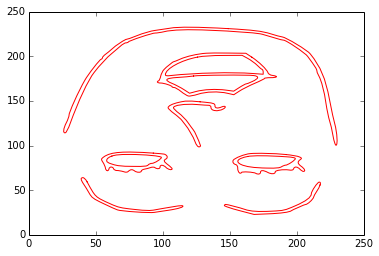

 30%|███       | 62/205 [00:19<00:46,  3.11it/s]

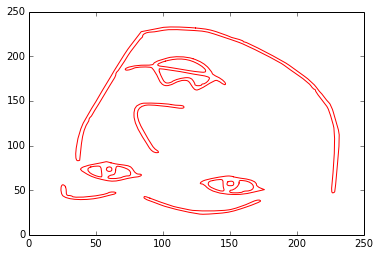

 31%|███       | 63/205 [00:20<00:45,  3.11it/s]

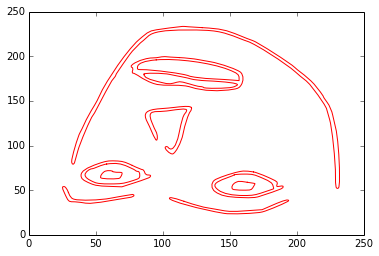

 31%|███       | 64/205 [00:20<00:45,  3.12it/s]

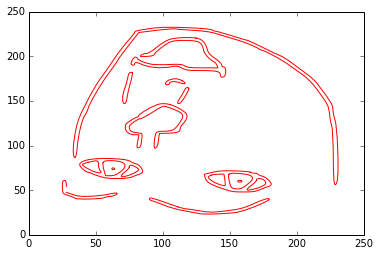

 32%|███▏      | 65/205 [00:20<00:44,  3.13it/s]

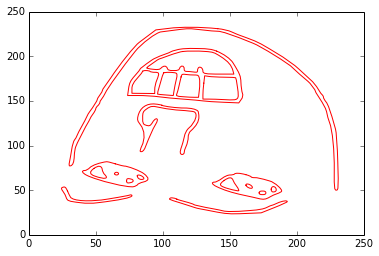

 32%|███▏      | 66/205 [00:21<00:44,  3.14it/s]

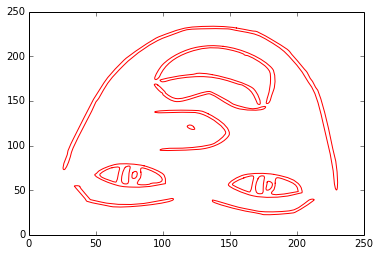

 33%|███▎      | 67/205 [00:21<00:43,  3.14it/s]

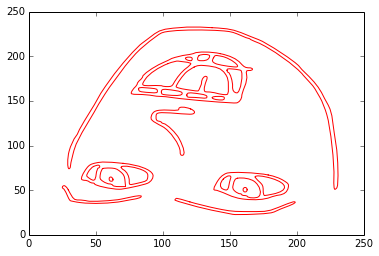

 33%|███▎      | 68/205 [00:21<00:43,  3.15it/s]

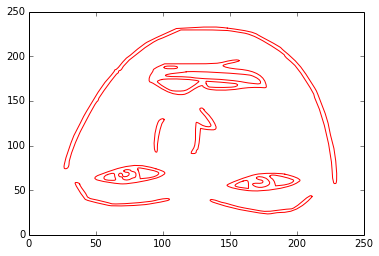

 34%|███▎      | 69/205 [00:21<00:43,  3.15it/s]

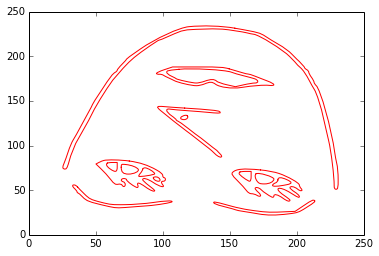

 34%|███▍      | 70/205 [00:22<00:42,  3.16it/s]

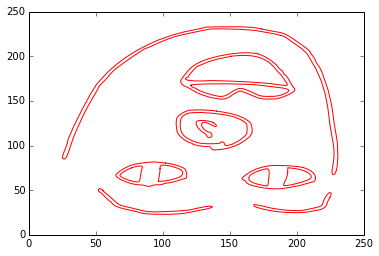

 35%|███▍      | 71/205 [00:22<00:42,  3.16it/s]

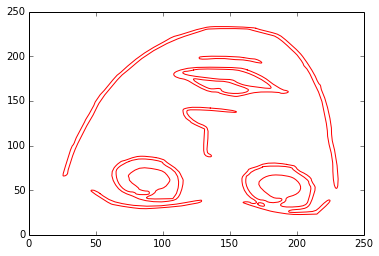

 35%|███▌      | 72/205 [00:22<00:41,  3.17it/s]

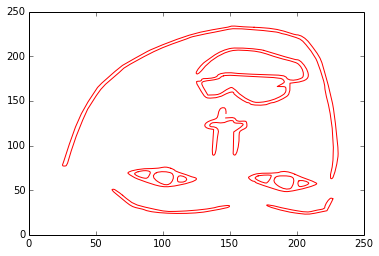

 36%|███▌      | 73/205 [00:22<00:41,  3.18it/s]

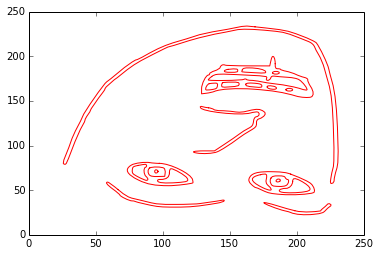

 36%|███▌      | 74/205 [00:23<00:41,  3.18it/s]

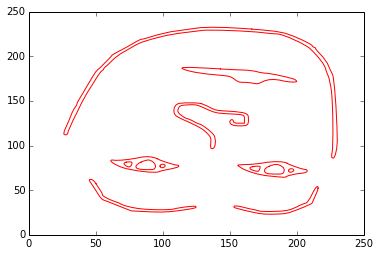

 37%|███▋      | 75/205 [00:23<00:40,  3.19it/s]

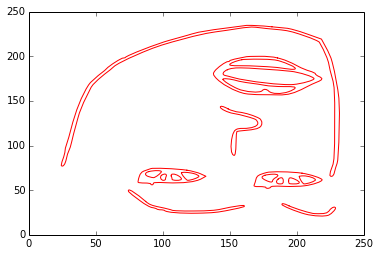

 37%|███▋      | 76/205 [00:23<00:40,  3.19it/s]

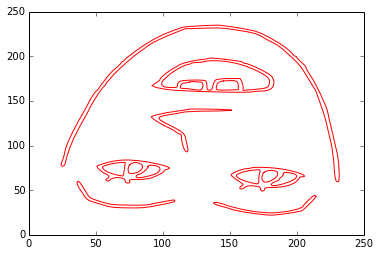

 38%|███▊      | 77/205 [00:24<00:40,  3.19it/s]

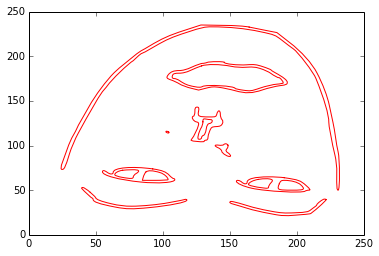

 38%|███▊      | 78/205 [00:24<00:39,  3.20it/s]

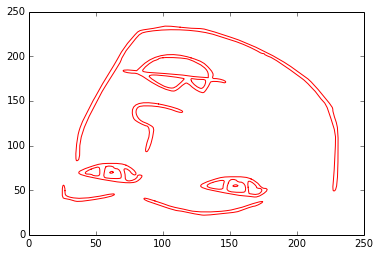

 39%|███▊      | 79/205 [00:24<00:39,  3.20it/s]

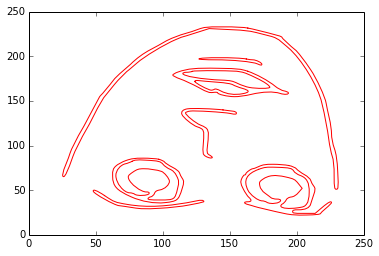

 39%|███▉      | 80/205 [00:24<00:38,  3.21it/s]

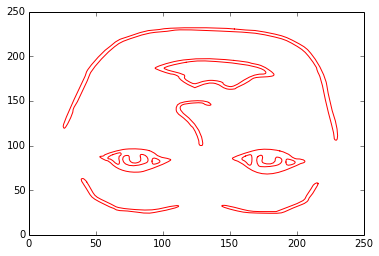

 40%|███▉      | 81/205 [00:25<00:38,  3.21it/s]

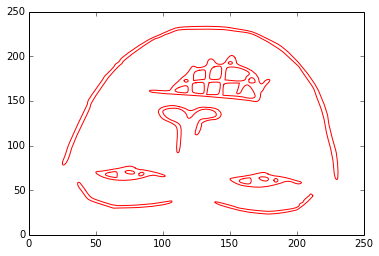

 40%|████      | 82/205 [00:25<00:38,  3.21it/s]

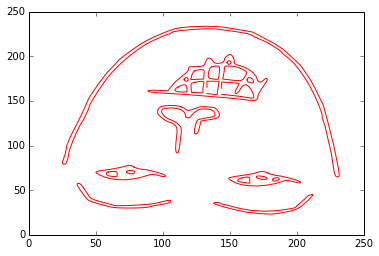

 40%|████      | 83/205 [00:25<00:37,  3.22it/s]

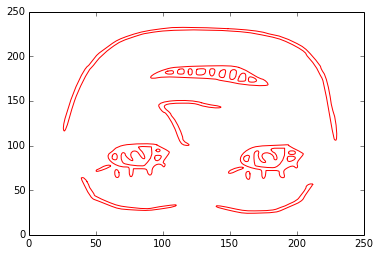

 41%|████      | 84/205 [00:26<00:37,  3.22it/s]

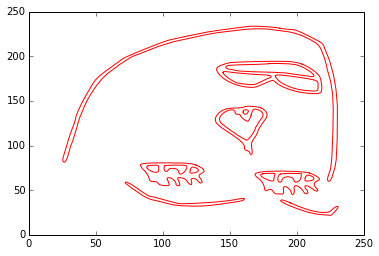

 41%|████▏     | 85/205 [00:26<00:37,  3.22it/s]

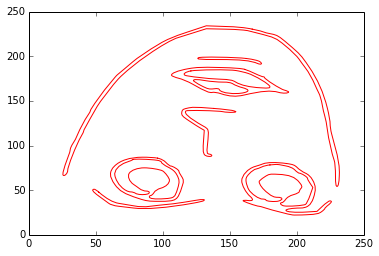

 42%|████▏     | 86/205 [00:26<00:36,  3.23it/s]

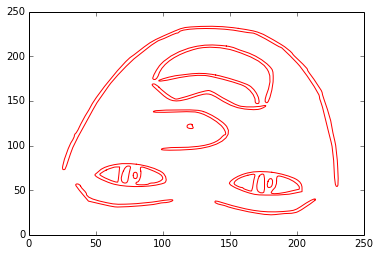

 42%|████▏     | 87/205 [00:26<00:36,  3.23it/s]

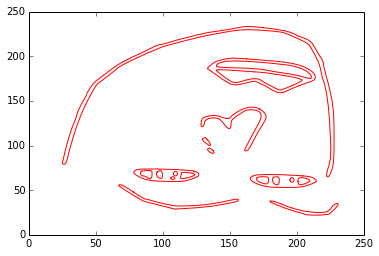

 43%|████▎     | 88/205 [00:27<00:36,  3.23it/s]

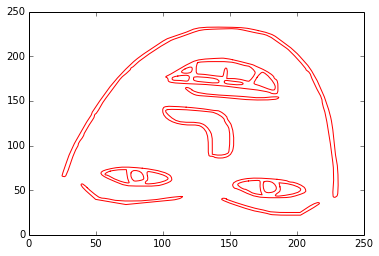

 43%|████▎     | 89/205 [00:27<00:35,  3.23it/s]

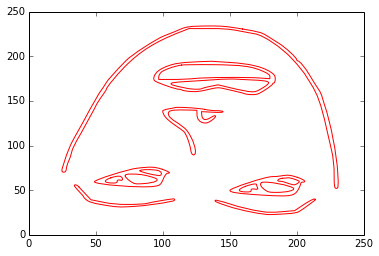

 44%|████▍     | 90/205 [00:27<00:35,  3.24it/s]

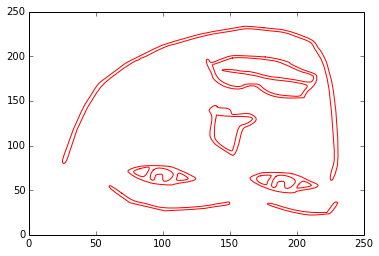

 44%|████▍     | 91/205 [00:28<00:35,  3.24it/s]

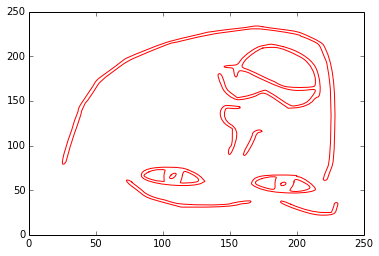

 45%|████▍     | 92/205 [00:28<00:34,  3.24it/s]

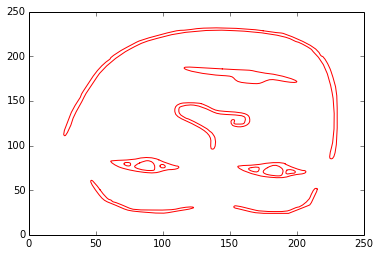

 45%|████▌     | 93/205 [00:28<00:34,  3.25it/s]

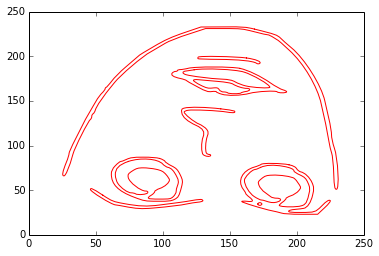

 46%|████▌     | 94/205 [00:28<00:34,  3.25it/s]

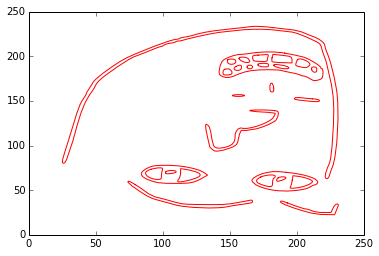

 46%|████▋     | 95/205 [00:29<00:33,  3.25it/s]

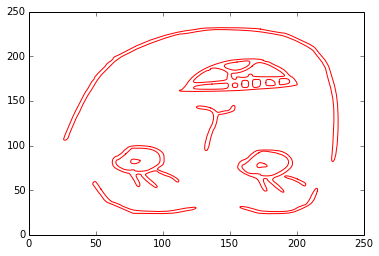

 47%|████▋     | 96/205 [00:29<00:33,  3.25it/s]

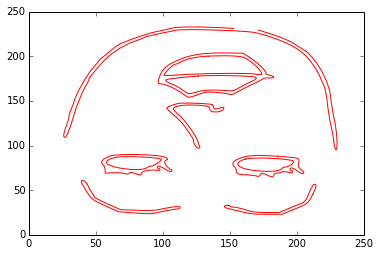

 47%|████▋     | 97/205 [00:29<00:33,  3.26it/s]

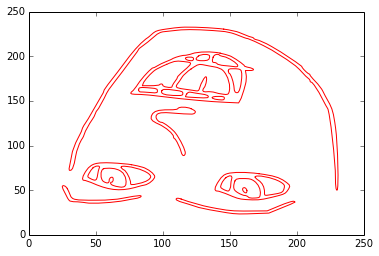

 48%|████▊     | 98/205 [00:30<00:32,  3.26it/s]

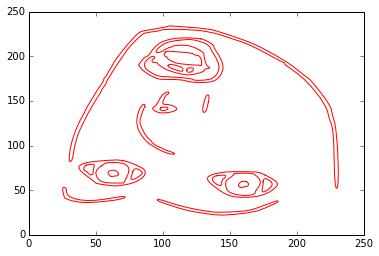

 48%|████▊     | 99/205 [00:30<00:32,  3.26it/s]

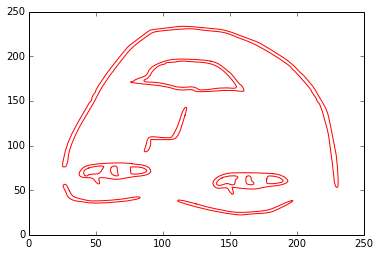

 49%|████▉     | 100/205 [00:30<00:32,  3.27it/s]

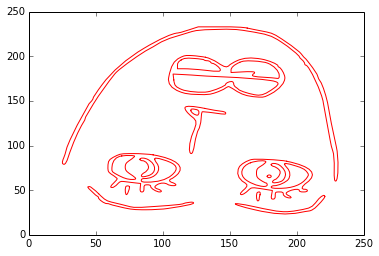

 49%|████▉     | 101/205 [00:30<00:31,  3.27it/s]

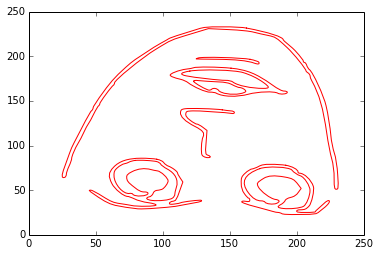

 50%|████▉     | 102/205 [00:31<00:31,  3.27it/s]

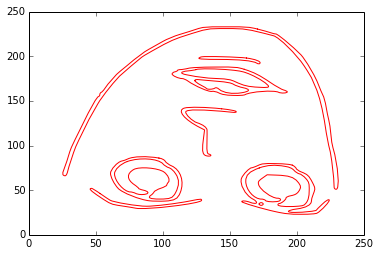

 50%|█████     | 103/205 [00:31<00:31,  3.28it/s]

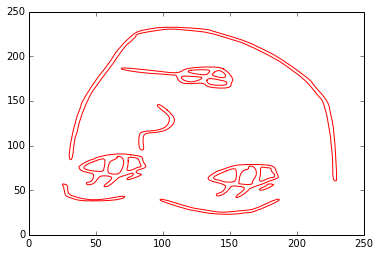

 51%|█████     | 104/205 [00:31<00:30,  3.28it/s]

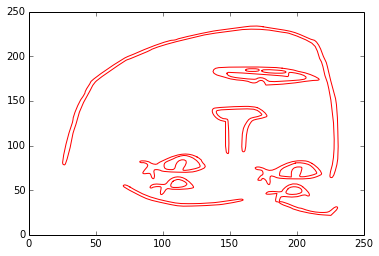

 51%|█████     | 105/205 [00:31<00:30,  3.28it/s]

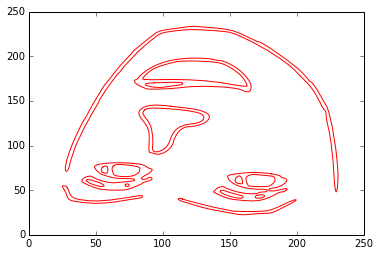

 52%|█████▏    | 106/205 [00:32<00:30,  3.29it/s]

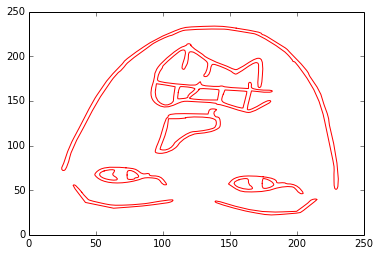

 52%|█████▏    | 107/205 [00:32<00:29,  3.29it/s]

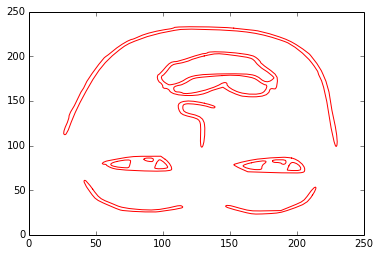

 53%|█████▎    | 108/205 [00:32<00:29,  3.29it/s]

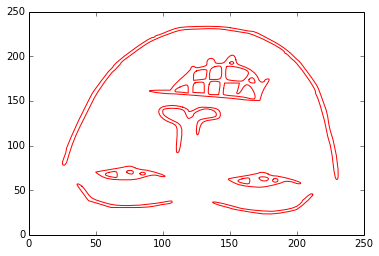

 53%|█████▎    | 109/205 [00:33<00:29,  3.30it/s]

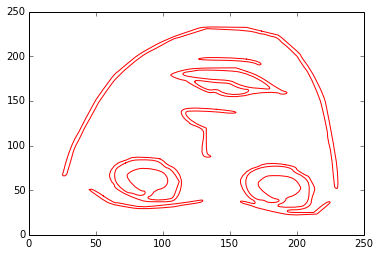

 54%|█████▎    | 110/205 [00:33<00:28,  3.30it/s]

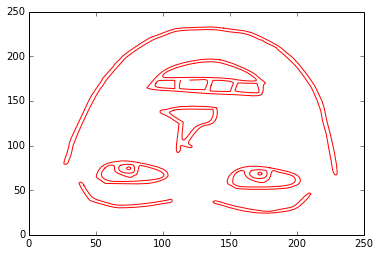

 54%|█████▍    | 111/205 [00:33<00:28,  3.30it/s]

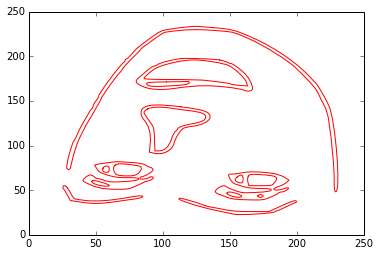

 55%|█████▍    | 112/205 [00:33<00:28,  3.31it/s]

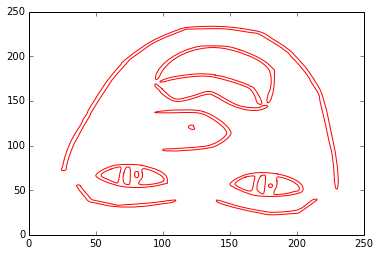

 55%|█████▌    | 113/205 [00:34<00:27,  3.31it/s]

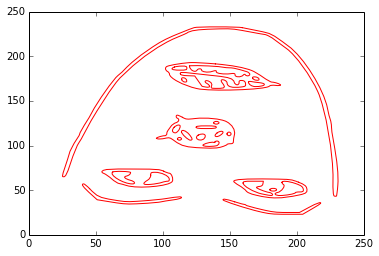

 56%|█████▌    | 114/205 [00:34<00:27,  3.31it/s]

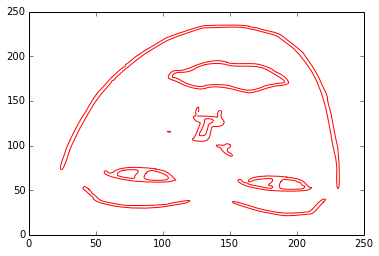

 56%|█████▌    | 115/205 [00:34<00:27,  3.31it/s]

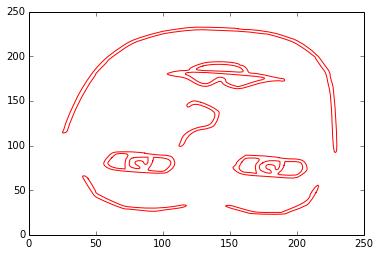

 57%|█████▋    | 116/205 [00:35<00:26,  3.31it/s]

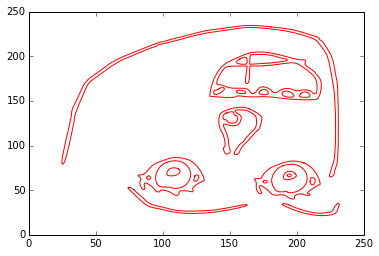

 57%|█████▋    | 117/205 [00:35<00:26,  3.31it/s]

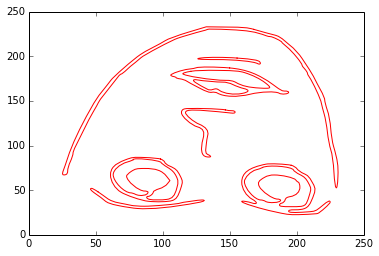

 58%|█████▊    | 118/205 [00:35<00:26,  3.32it/s]

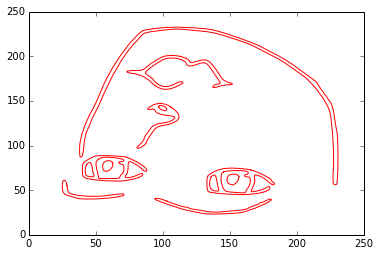

 58%|█████▊    | 119/205 [00:35<00:25,  3.32it/s]

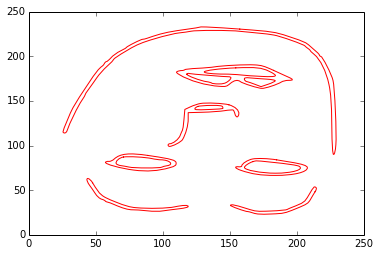

 59%|█████▊    | 120/205 [00:36<00:25,  3.32it/s]

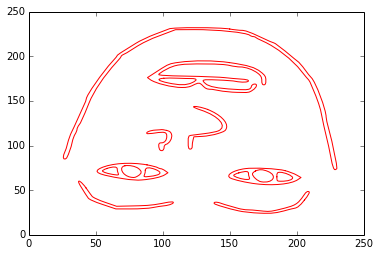

 59%|█████▉    | 121/205 [00:36<00:25,  3.33it/s]

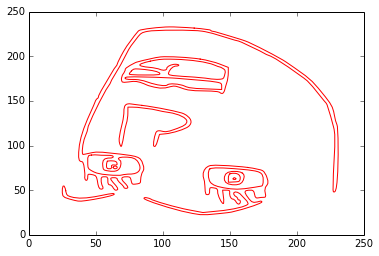

 60%|█████▉    | 122/205 [00:36<00:24,  3.33it/s]

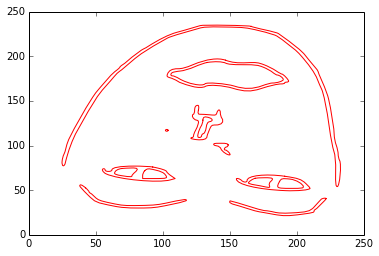

 60%|██████    | 123/205 [00:36<00:24,  3.33it/s]

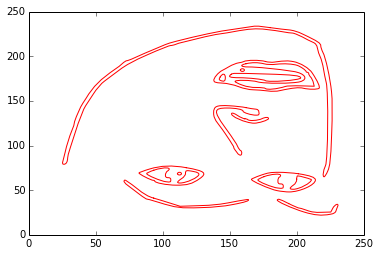

 60%|██████    | 124/205 [00:37<00:24,  3.32it/s]

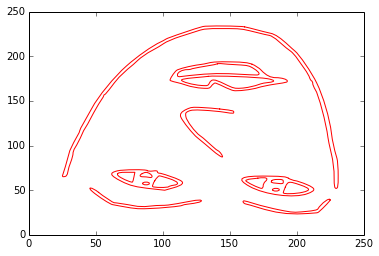

 61%|██████    | 125/205 [00:37<00:24,  3.33it/s]

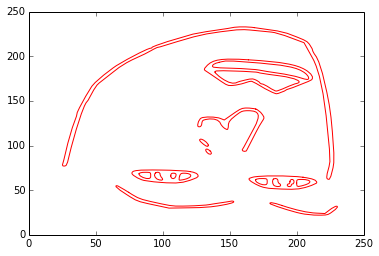

 61%|██████▏   | 126/205 [00:37<00:23,  3.33it/s]

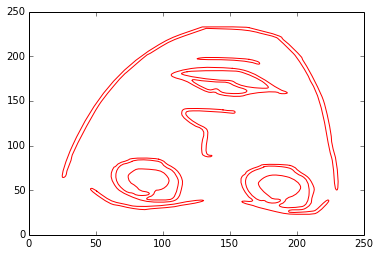

 62%|██████▏   | 127/205 [00:38<00:23,  3.33it/s]

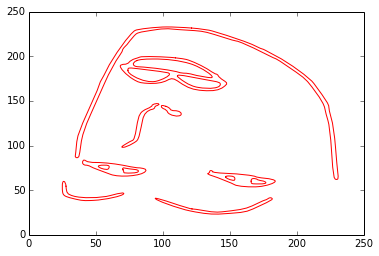

 62%|██████▏   | 128/205 [00:38<00:23,  3.33it/s]

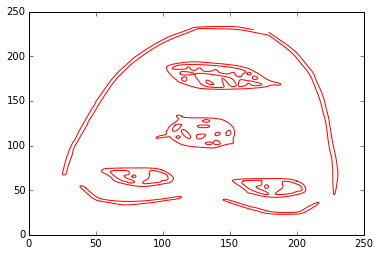

 63%|██████▎   | 129/205 [00:38<00:22,  3.33it/s]

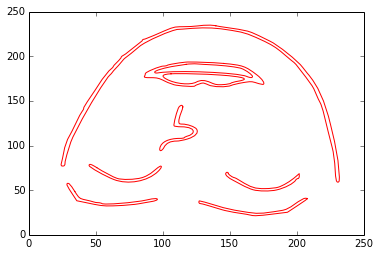

 63%|██████▎   | 130/205 [00:38<00:22,  3.34it/s]

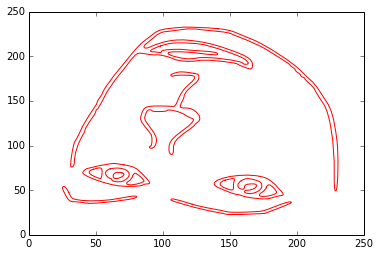

 64%|██████▍   | 131/205 [00:39<00:22,  3.34it/s]

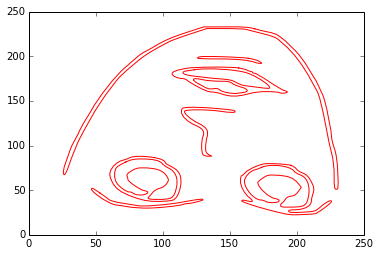

 64%|██████▍   | 132/205 [00:39<00:21,  3.34it/s]

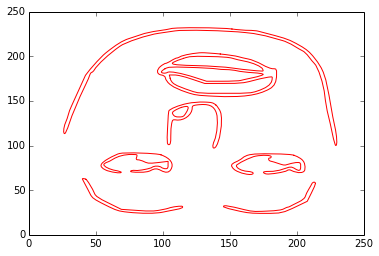

 65%|██████▍   | 133/205 [00:39<00:21,  3.35it/s]

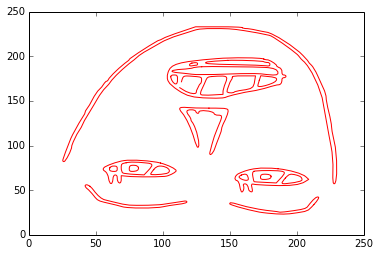

 65%|██████▌   | 134/205 [00:40<00:21,  3.35it/s]

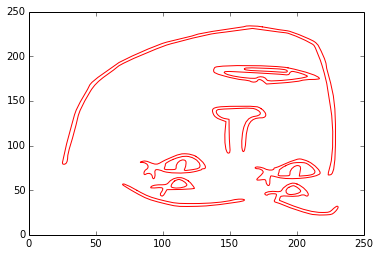

 66%|██████▌   | 135/205 [00:40<00:20,  3.35it/s]

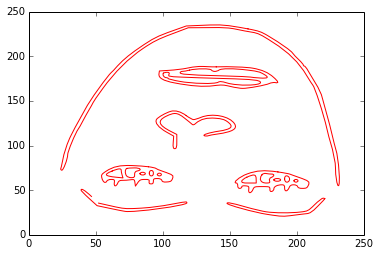

 66%|██████▋   | 136/205 [00:40<00:20,  3.35it/s]

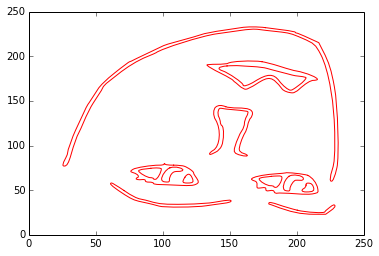

 67%|██████▋   | 137/205 [00:40<00:20,  3.35it/s]

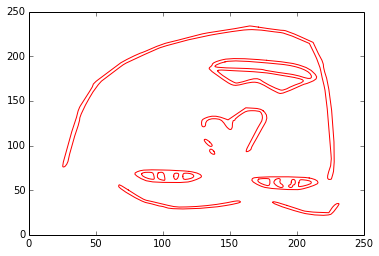

 67%|██████▋   | 138/205 [00:41<00:19,  3.36it/s]

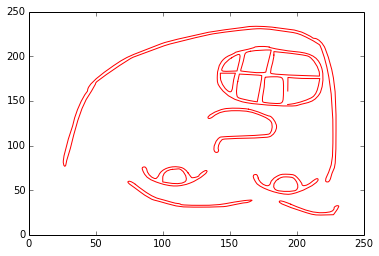

 68%|██████▊   | 139/205 [00:41<00:19,  3.36it/s]

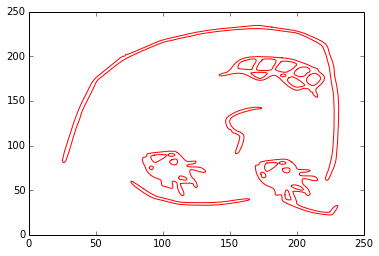

 68%|██████▊   | 140/205 [00:41<00:19,  3.36it/s]

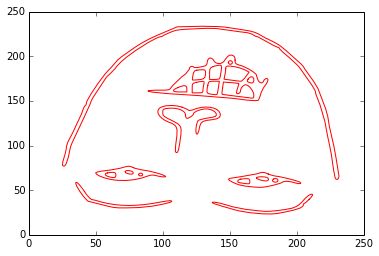

 69%|██████▉   | 141/205 [00:41<00:19,  3.36it/s]

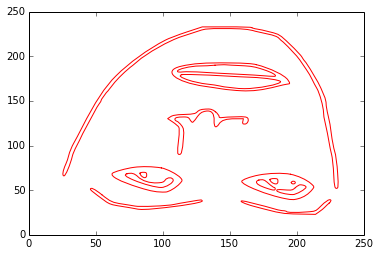

 69%|██████▉   | 142/205 [00:42<00:18,  3.36it/s]

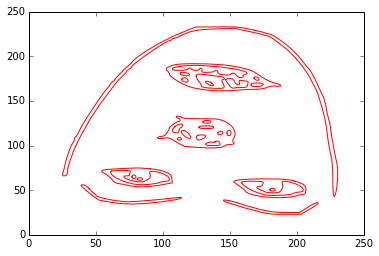

 70%|██████▉   | 143/205 [00:42<00:18,  3.36it/s]

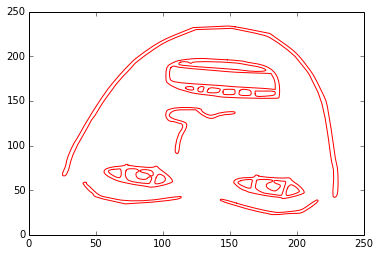

 70%|███████   | 144/205 [00:42<00:18,  3.36it/s]

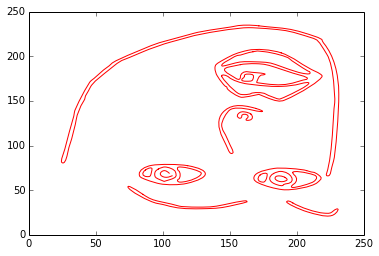

 71%|███████   | 145/205 [00:43<00:17,  3.36it/s]

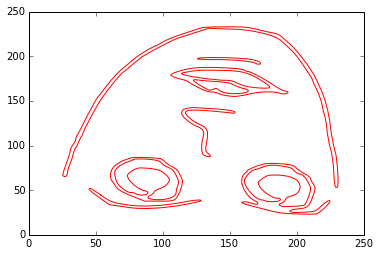

 71%|███████   | 146/205 [00:43<00:17,  3.36it/s]

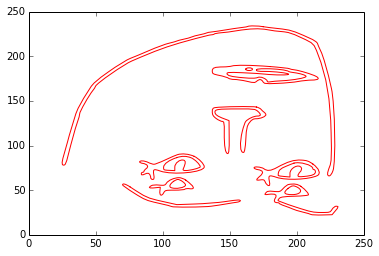

 72%|███████▏  | 147/205 [00:43<00:17,  3.37it/s]

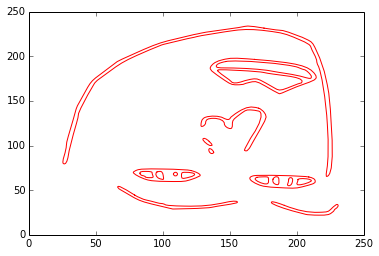

 72%|███████▏  | 148/205 [00:43<00:16,  3.37it/s]

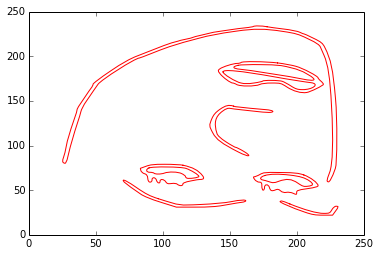

 73%|███████▎  | 149/205 [00:44<00:16,  3.37it/s]

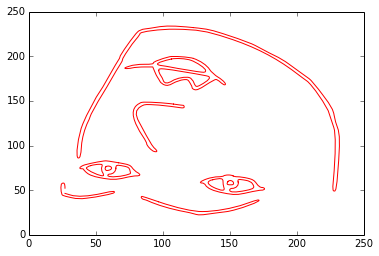

 73%|███████▎  | 150/205 [00:44<00:16,  3.37it/s]

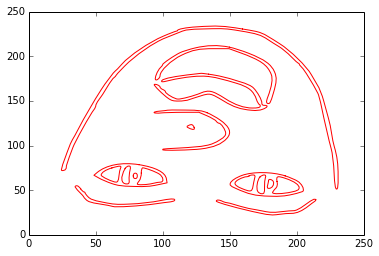

 74%|███████▎  | 151/205 [00:44<00:16,  3.37it/s]

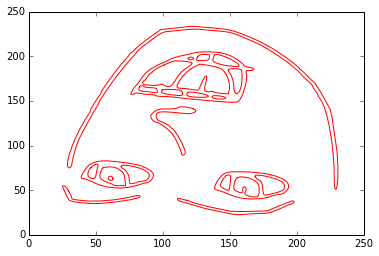

 74%|███████▍  | 152/205 [00:45<00:15,  3.37it/s]

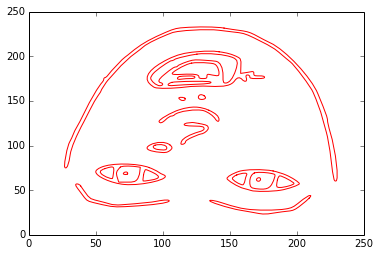

 75%|███████▍  | 153/205 [00:45<00:15,  3.37it/s]

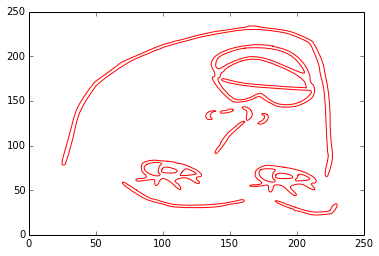

 75%|███████▌  | 154/205 [00:45<00:15,  3.37it/s]

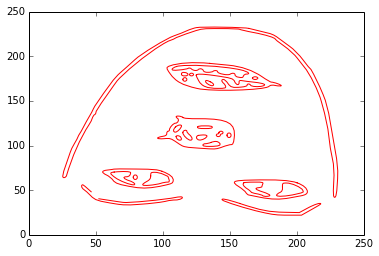

 76%|███████▌  | 155/205 [00:45<00:14,  3.38it/s]

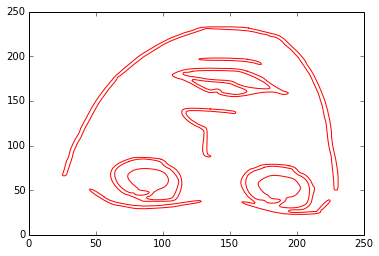

 76%|███████▌  | 156/205 [00:46<00:14,  3.38it/s]

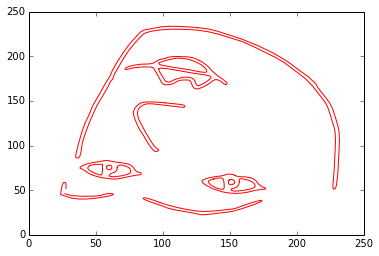

 77%|███████▋  | 157/205 [00:46<00:14,  3.38it/s]

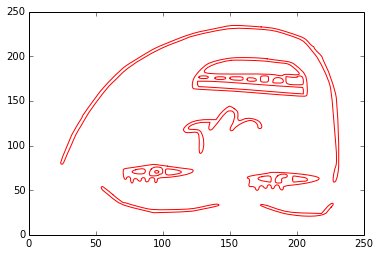

 77%|███████▋  | 158/205 [00:46<00:13,  3.38it/s]

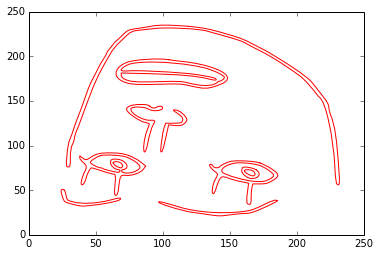

 78%|███████▊  | 159/205 [00:47<00:13,  3.37it/s]

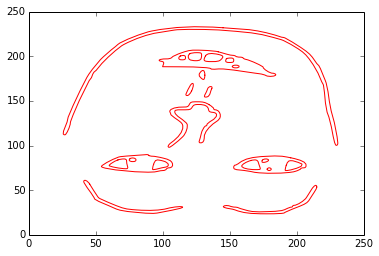

 78%|███████▊  | 160/205 [00:47<00:13,  3.37it/s]

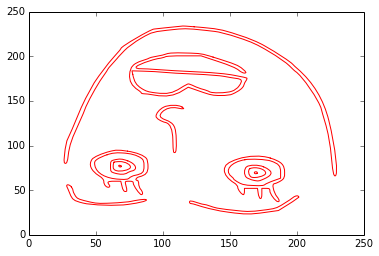

 79%|███████▊  | 161/205 [00:47<00:13,  3.37it/s]

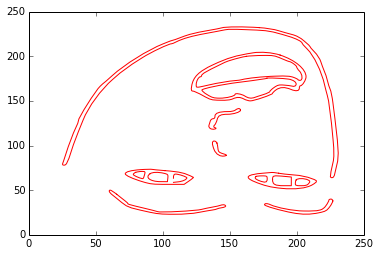

 79%|███████▉  | 162/205 [00:48<00:12,  3.37it/s]

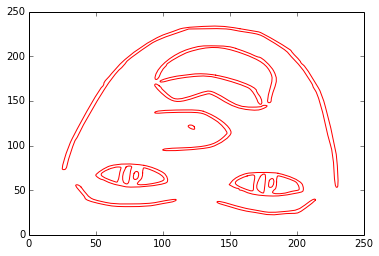

 80%|███████▉  | 163/205 [00:48<00:12,  3.38it/s]

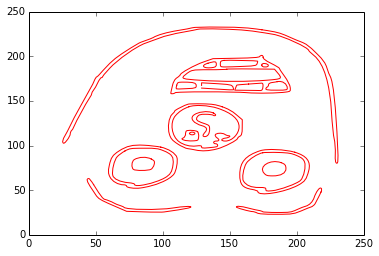

 80%|████████  | 164/205 [00:48<00:12,  3.38it/s]

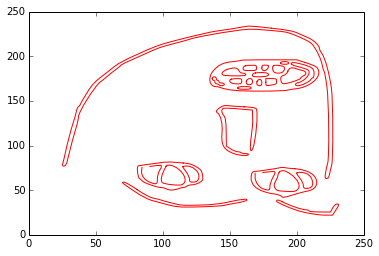

 80%|████████  | 165/205 [00:48<00:11,  3.37it/s]

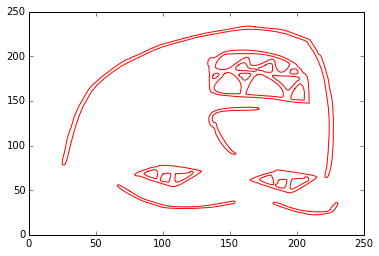

 81%|████████  | 166/205 [00:49<00:11,  3.38it/s]

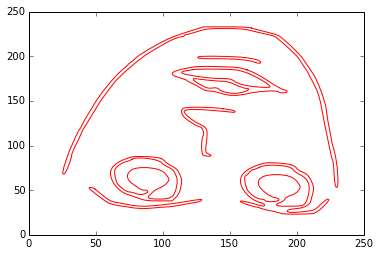

 81%|████████▏ | 167/205 [00:49<00:11,  3.38it/s]

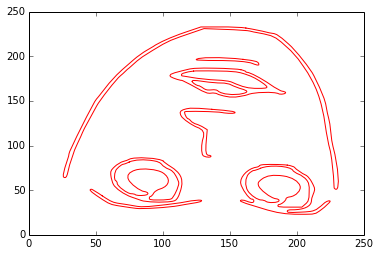

 82%|████████▏ | 168/205 [00:49<00:10,  3.38it/s]

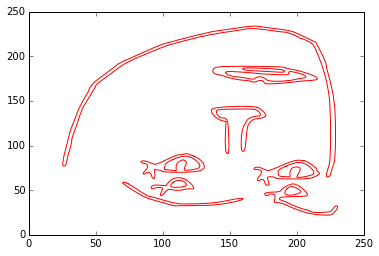

 82%|████████▏ | 169/205 [00:49<00:10,  3.38it/s]

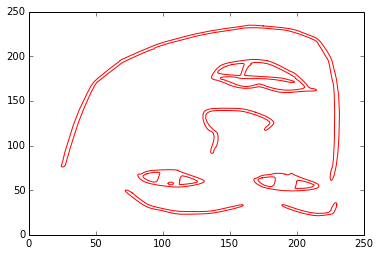

 83%|████████▎ | 170/205 [00:50<00:10,  3.38it/s]

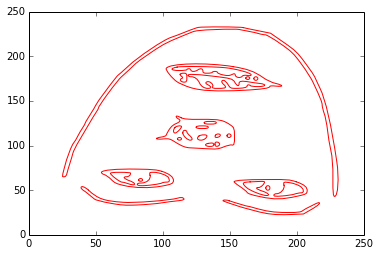

 83%|████████▎ | 171/205 [00:50<00:10,  3.38it/s]

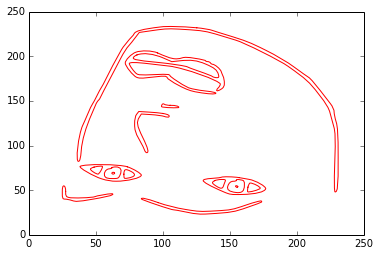

 84%|████████▍ | 172/205 [00:50<00:09,  3.39it/s]

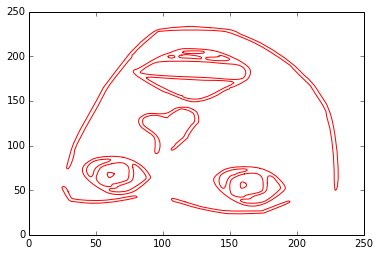

 84%|████████▍ | 173/205 [00:51<00:09,  3.39it/s]

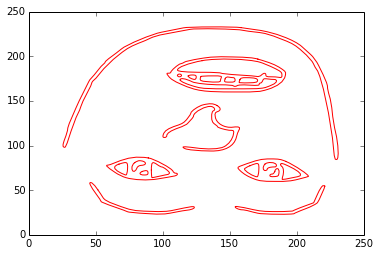

 85%|████████▍ | 174/205 [00:51<00:09,  3.39it/s]

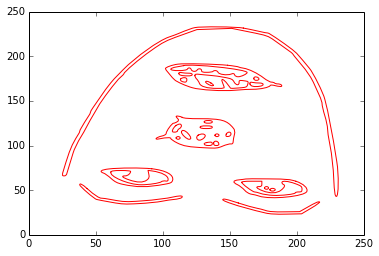

 85%|████████▌ | 175/205 [00:51<00:08,  3.39it/s]

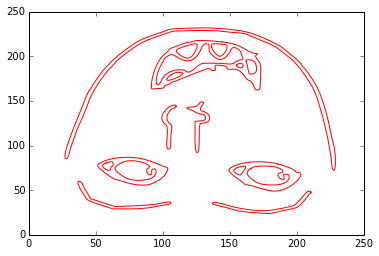

 86%|████████▌ | 176/205 [00:51<00:08,  3.39it/s]

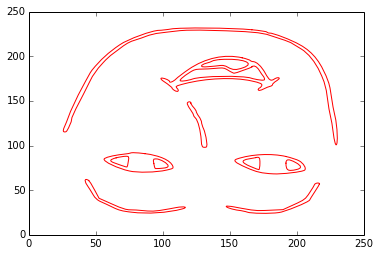

 86%|████████▋ | 177/205 [00:52<00:08,  3.39it/s]

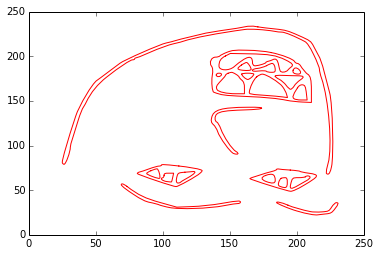

 87%|████████▋ | 178/205 [00:52<00:07,  3.39it/s]

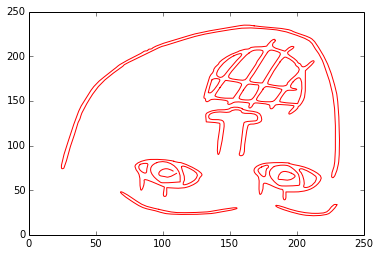

 87%|████████▋ | 179/205 [00:52<00:07,  3.39it/s]

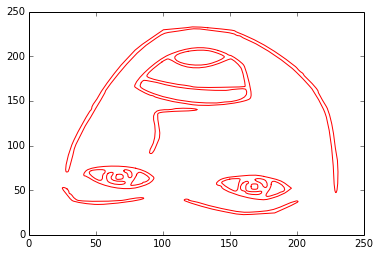

 88%|████████▊ | 180/205 [00:53<00:07,  3.39it/s]

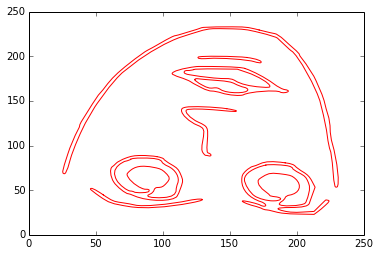

 88%|████████▊ | 181/205 [00:53<00:07,  3.39it/s]

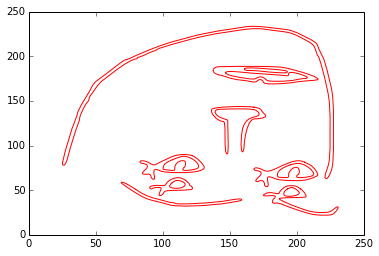

 89%|████████▉ | 182/205 [00:53<00:06,  3.39it/s]

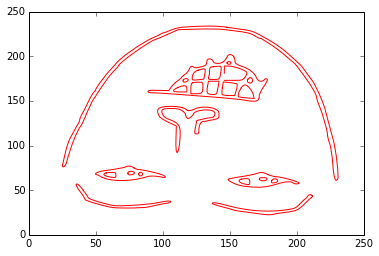

 89%|████████▉ | 183/205 [00:53<00:06,  3.39it/s]

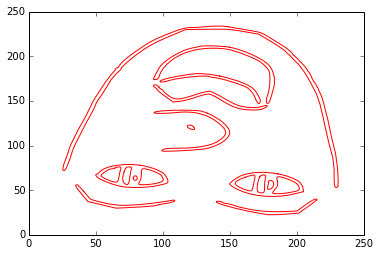

 90%|████████▉ | 184/205 [00:54<00:06,  3.39it/s]

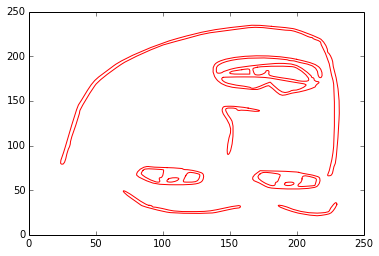

 90%|█████████ | 185/205 [00:54<00:05,  3.39it/s]

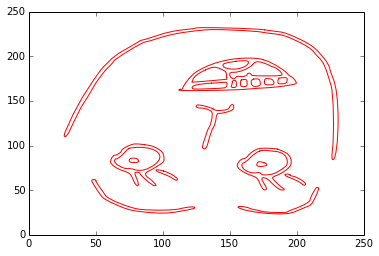

 91%|█████████ | 186/205 [00:54<00:05,  3.39it/s]

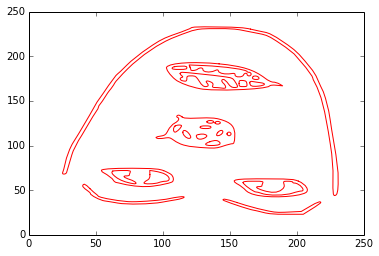

 91%|█████████ | 187/205 [00:55<00:05,  3.39it/s]

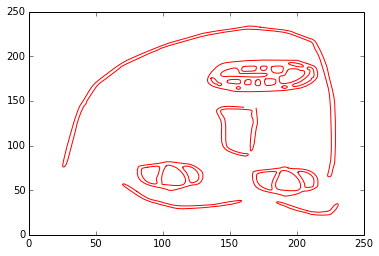

 92%|█████████▏| 188/205 [00:55<00:05,  3.39it/s]

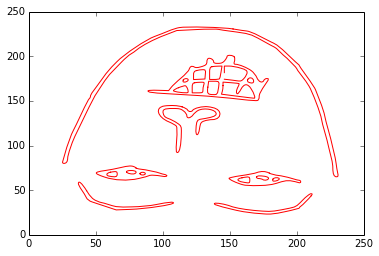

 92%|█████████▏| 189/205 [00:55<00:04,  3.39it/s]

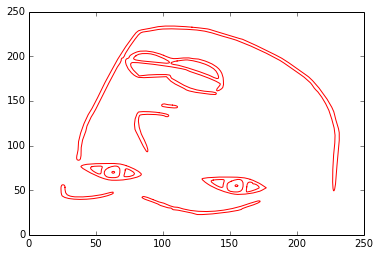

 93%|█████████▎| 190/205 [00:55<00:04,  3.39it/s]

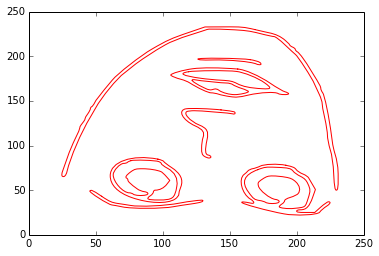

 93%|█████████▎| 191/205 [00:56<00:04,  3.40it/s]

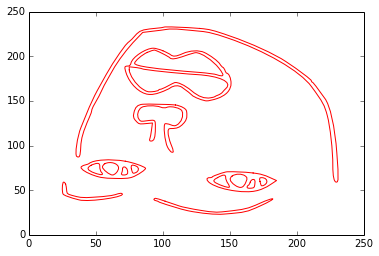

 94%|█████████▎| 192/205 [00:56<00:03,  3.40it/s]

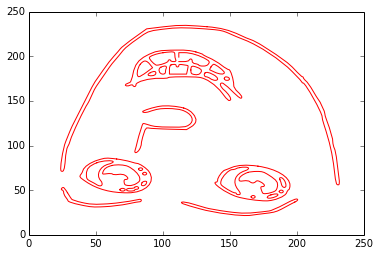

 94%|█████████▍| 193/205 [00:56<00:03,  3.40it/s]

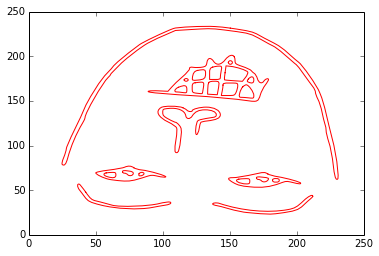

 95%|█████████▍| 194/205 [00:57<00:03,  3.39it/s]

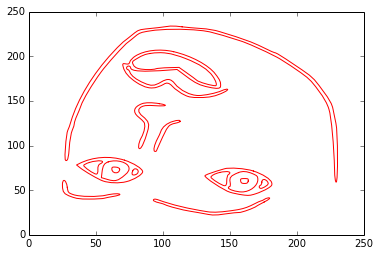

 95%|█████████▌| 195/205 [00:57<00:02,  3.39it/s]

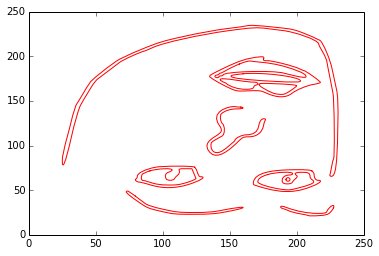

 96%|█████████▌| 196/205 [00:57<00:02,  3.39it/s]

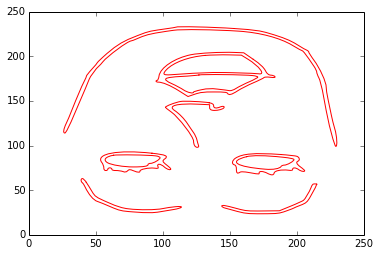

 96%|█████████▌| 197/205 [00:58<00:02,  3.39it/s]

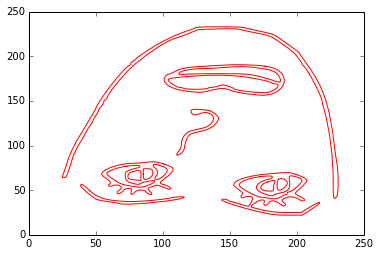

 97%|█████████▋| 198/205 [00:58<00:02,  3.40it/s]

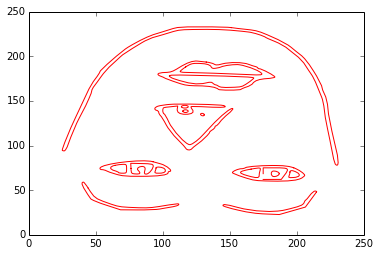

 97%|█████████▋| 199/205 [00:58<00:01,  3.40it/s]

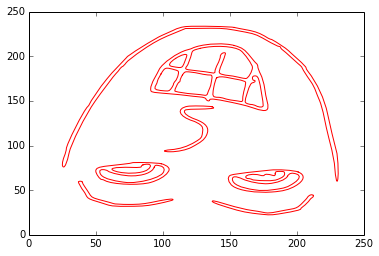

 98%|█████████▊| 200/205 [00:58<00:01,  3.40it/s]

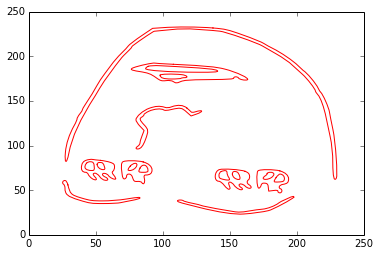

 98%|█████████▊| 201/205 [00:59<00:01,  3.40it/s]

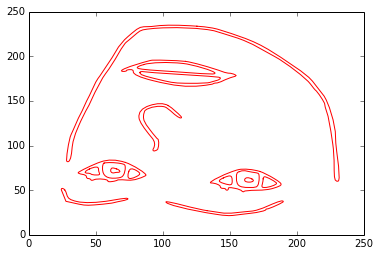

 99%|█████████▊| 202/205 [00:59<00:00,  3.40it/s]

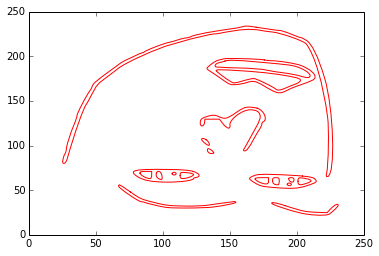

 99%|█████████▉| 203/205 [00:59<00:00,  3.40it/s]

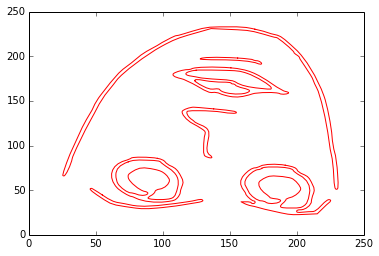

100%|█████████▉| 204/205 [00:59<00:00,  3.40it/s]

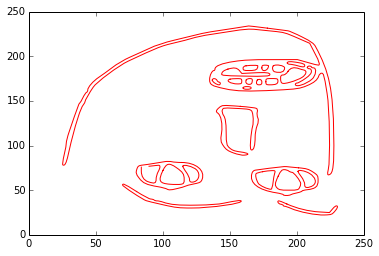

100%|██████████| 205/205 [01:00<00:00,  3.40it/s]

717 1349
961.1512195121951


In [4]:
stroke_len = []
for face in tqdm(load_faces()):
    # print face
    im = cv2.imread(face, 0)
    strokes = convert_to_3_stroke(im)
    stroke_len.append(len(strokes))
print min(stroke_len), max(stroke_len)
stroke_len = np.array(stroke_len)
print np.mean(stroke_len)

In [5]:
stroke_len

array([ 827, 1019,  868,  844,  796,  958,  973,  990,  992,  805, 1003, 1002, 1153,  959,  796,  877,  822,  884,  958,  918, 1030,  860,  832, 1035, 1112,  886, 1149, 1014,  957,  811, 1053,  880,  979, 1008,  801, 1007,  945,  976,  789,  787, 1097,  796, 1127,  912,  815,  945, 1106,  992,  867, 1061,  893,  971,  876, 1013,  921,  873, 1004,  861,  809, 1009,  881,  857,  867,  819,  977, 1018,  927, 1156,  899,  956,  938, 1017,  925, 1084,  746,  851,  965,  881,  873,  946,  813, 1044,  973, 1137, 1001,  951,  939,  835, 1014,  805,  911,  841,  718,  998, 1020, 1096,  809, 1164, 1048,  808, 1212, 1006,  968,  940, 1038,  985, 1078,  826,  995,  935,  901,  930,  926, 1116,  898,  883, 1258,  978,  903,  755,  853, 1149,  913,  898,  855,  840,  948,  757, 1181,  717,  992,  932,  905, 1090,  961,  994,  913,  859,  849, 1163, 1006,  835, 1190, 1043, 1000,  989, 1022,  871,  799,  794,  989, 1175, 1065, 1084, 1126,  984,  804, 1077,  921, 1022,  985,  863,  994, 1164, 1129, 101